<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/1_EDA_Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [5]:
# Data Cleaning / Manipulation

# Convert job_posted_date column to datetime data type from object (str)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert job_skills column from string into string list object
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [122]:
# Number of Jobs per Job Title
df['job_title_short'].value_counts().to_frame()

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


### Checking how many job title and their work from home status

In [33]:
# Job title count for job_work_from_home status 
df_job_wfh = df.value_counts(subset=['job_title_short', 'job_work_from_home']).to_frame().sort_values(by=['job_work_from_home', 'job_title_short'], ascending = False)
df_job_wfh = df_job_wfh.sort_values(by='count', ascending=False)

In [121]:
# Pivot the results for visualization
df_job_wfh_pivot = df_job_wfh.pivot_table(index='job_title_short', values='count', columns='job_work_from_home')
df_job_wfh_pivot

job_work_from_home,False,True
job_title_short,,
Business Analyst,46274.0,2789.0
Cloud Engineer,11760.0,571.0
Data Analyst,182749.0,13326.0
Data Engineer,165030.0,21211.0
Data Scientist,157751.0,14535.0
Machine Learning Engineer,12592.0,1488.0
Senior Data Analyst,26872.0,2344.0
Senior Data Engineer,38004.0,6559.0
Senior Data Scientist,33158.0,3799.0


<Axes: ylabel='job_title_short'>

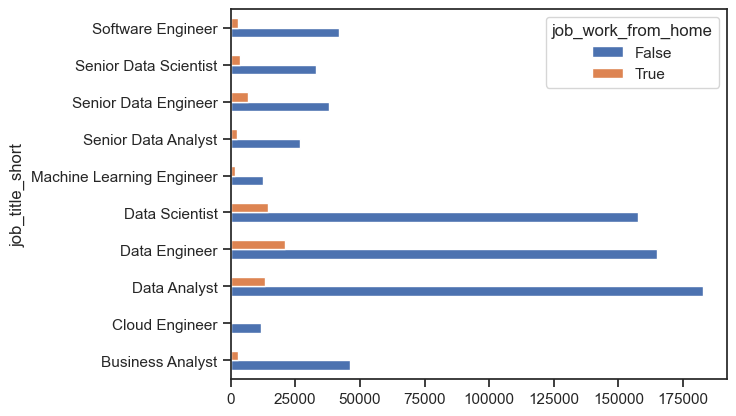

In [120]:
df_job_wfh_pivot.plot(kind='barh')

### Countries to Explore

In [153]:
# Total Data analyst jobs per Country
df[['job_country']].value_counts().to_frame().head(20)

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


### Subset data from countries Singapore and Philippines

In [173]:
## Extracting Data analyst jobs for Philippines and Singapore
df_SGPH = df.query(' (job_country == "Philippines") | (job_country == "Singapore") ')
df_SGPH

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,[sql],{'programming': ['sql']}
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None
87,Data Scientist,Data Science Team Lead,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-23 13:47:01,False,False,Singapore,None,NaN,NaN,GovTech Singapore,"[r, python, tableau, qlik]","{'analyst_tools': ['tableau', 'qlik'], 'progra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785660,Data Scientist,Data Science Mentor,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Eskwelabs,[go],{'programming': ['go']}
785688,Business Analyst,Business Analyst,"Taguig, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,Cognizant,None,None
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,"[vba, sap, word, powerpoint, excel]","{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"[docker, kubernetes]","{'other': ['docker', 'kubernetes']}"


### Companies to Explore SG and PH

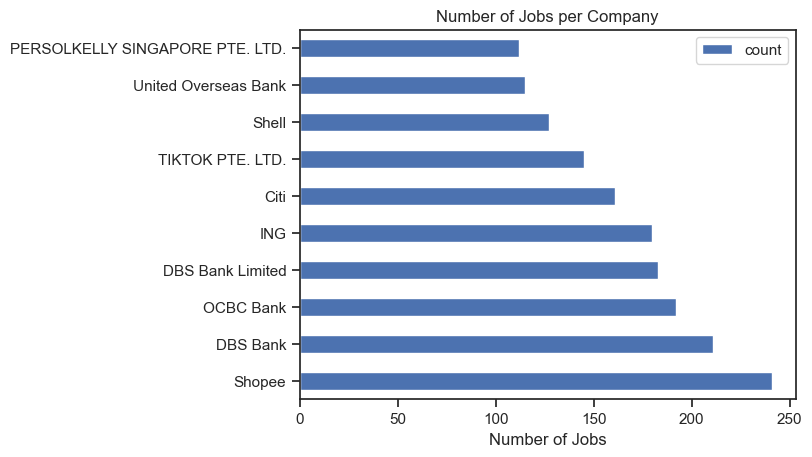

In [184]:
## Top 10 Companies in SG and PH that demands Data Analyst roles
df_SGPH['company_name'].value_counts().to_frame()[1:].head(10).plot(kind='barh')

plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()